<a href="https://colab.research.google.com/github/XuechengWu/mask_RCNN/blob/main/Run_Mask_RCNN_on_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Google Drive append**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# [Notizen] 直链获取方法

In [ ]:
# 获取分享链接

# 测试图zip-dropbox： https://www.dropbox.com/s/ftzyi2x8bhyuc98/colabDataset.zip?dl=0

# 点h5.zip-dropbox： https://www.dropbox.com/s/jm2nyag5a7zzsxn/mask_rcnn_object_0005.zip?dl=0


# Dropbox 直链方法

# https://www.dropbox.com/s/qtikk8ob8fx1n7g/Agatha.zip?dl=0

# 一：将 www 替换成 dl-web

# 二：将尾端 ?dl=0 删除掉

# 然后我们就得到了直链地址：

# https://dl-web.dropbox.com/s/qtikk8ob8fx1n7g/Agatha.zip


# **2. Download .h5-zip and imageDataSet-zip**

In [ ]:
# point_h_5_zip
!wget https://dl-web.dropbox.com/s/jm2nyag5a7zzsxn/mask_rcnn_object_0005.zip

In [ ]:
# imageDataSet_zip
!wget https://dl-web.dropbox.com/s/ftzyi2x8bhyuc98/colabDataset.zip

In [ ]:
# unzip zipFiel
!unzip colabDataset.zip
!unzip mask_rcnn_object_0005.zip

# **3. Import Package** 

In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

# **4. Bestätigen GPU**

In [ ]:
!nvidia-smi

# **5. Load Kerne**

In [10]:
test_model, inference_config = load_inference_model(1, "/content/mask_rcnn_object_0005.h5")

Loading weights from  /content/mask_rcnn_object_0005.h5


# **6. Read image**

In [18]:
# Load Image
# crope1 ----- crope412
img = cv2.imread("/content/colabDataset/crope100.jpg")

imgCopy = img.copy()
image = cv2.cvtColor(imgCopy, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

# **7. Ergebnis**

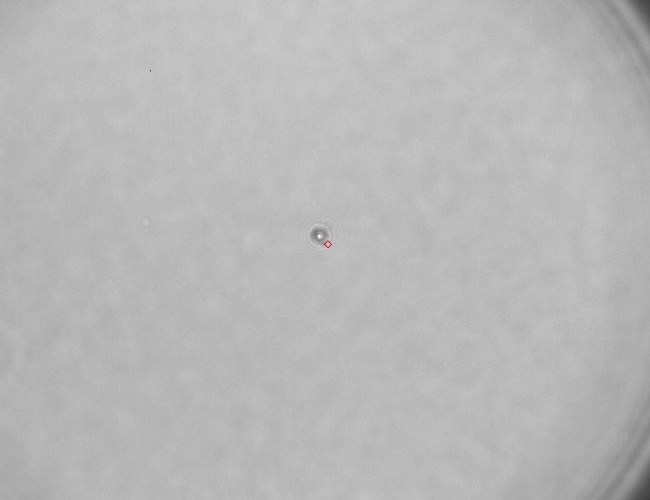

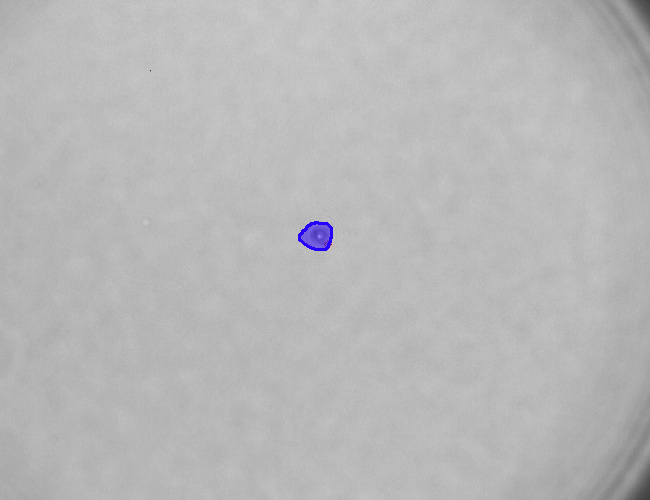

In [19]:
from google.colab.patches import cv2_imshow
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(imgCopy, [cnt], True, colors[i], 2)
        imgCopy = draw_mask(imgCopy, [cnt], colors[i])

cv2_imshow(img)
cv2_imshow(imgCopy)